<a href="https://colab.research.google.com/github/Rasmuel/pruebaia2/blob/main/5constelaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Crear las carpetas para subir las imagenes
!mkdir virgo
!mkdir cancer
!mkdir aries
!mkdir tauro
!mkdir escorpio

In [ ]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd virgo
!unzip virgo.zip
%cd ..

%cd cancer
!unzip cancer.zip
%cd ..

%cd aries
!unzip aries.zip
%cd ..

%cd tauro
!unzip tauro.zip
%cd ..

%cd escorpio
!unzip escorpio.zip
%cd ..

/content/virgo
Archive:  virgo.zip
  inflating: images (125).jpeg       
  inflating: images (127).jpeg       
  inflating: images (128).jpeg       
  inflating: images (131).jpeg       
  inflating: images (132).jpeg       
  inflating: images (133).jpeg       
  inflating: images (134).jpeg       
  inflating: images (135).jpeg       
  inflating: images (136).jpeg       
  inflating: images (137).jpeg       
  inflating: images (144).jpeg       
  inflating: images (145).jpeg       
  inflating: images (146).jpeg       
  inflating: images (148).jpeg       
  inflating: images (150).jpeg       
  inflating: images.jpeg             
  inflating: image (1).jpeg          
  inflating: image (1).png           
  inflating: image (3).jpeg          
  inflating: image (4).jpeg          
  inflating: image (6).jpeg          
  inflating: image (7).jpeg          
  inflating: image (8).jpeg          
  inflating: image (9).jpeg          
  inflating: image (12).jpeg         
  inflating: im

In [ ]:
#Borrar los archivo ZIP
!rm -rf /content/virgo/virgo.zip
!rm -rf /content/aries/aries.zip
!rm -rf /content/cancer/cancer.zip
!rm -rf /content/escorpio/escorpio.zip
!rm -rf /content/tauro/tauro.zip

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/virgo | wc -l #136
!ls /content/cancer | wc -l #123
!ls /content/aries | wc -l #132
!ls /content/tauro | wc -l #212
!ls /content/escorpio | wc -l #146

136
123
132
212
146


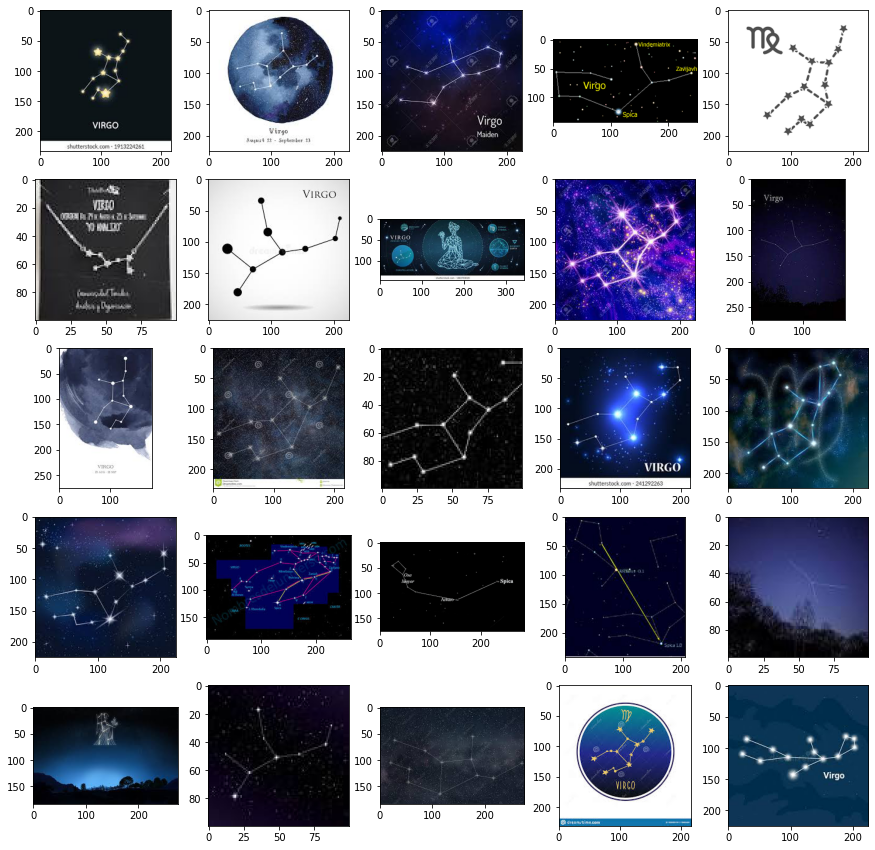

In [ ]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/virgo'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/cancer
!mkdir dataset/aries
!mkdir dataset/virgo
!mkdir dataset/tauro
!mkdir dataset/escorpio

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 419 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/aries'
carpeta_destino = '/content/dataset/aries'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 120:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/cancer'
carpeta_destino = '/content/dataset/cancer'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 120:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/virgo'
carpeta_destino = '/content/dataset/virgo'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 120:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/tauro'
carpeta_destino = '/content/dataset/tauro'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 120:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/escorpio'
carpeta_destino = '/content/dataset/escorpio'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 120:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/virgo | wc -l 
!ls /content/cancer | wc -l 
!ls /content/aries | wc -l  
!ls /content/tauro | wc -l  
!ls /content/escorpio | wc -l 

136
123
132
212
146


Found 477 images belonging to 5 classes.
Found 119 images belonging to 5 classes.


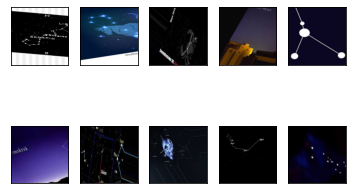

In [ ]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
15/15 [==============================] - 24s 1s/step - loss: 1.9112 - accuracy: 0.2055 - val_loss: 1.8447 - val_accuracy: 0.2017
Epoch 2/50
15/15 [==============================] - 19s 1s/step - loss: 1.7278 - accuracy: 0.2390 - val_loss: 1.7011 - val_accuracy: 0.2941
Epoch 3/50
15/15 [==============================] - 20s 1s/step - loss: 1.6258 - accuracy: 0.2746 - val_loss: 1.6933 - val_accuracy: 0.2605
Epoch 4/50
15/15 [==============================] - 19s 1s/step - loss: 1.5297 - accuracy: 0.3564 - val_loss: 1.6233 - val_accuracy: 0.3445
Epoch 5/50
15/15 [==============================] - 19s 1s/step - loss: 1.4924 - accuracy: 0.3480 - val_loss: 1.5852 - val_accuracy: 0.3109
Epoch 6/50
15/15 [==============================] - 19s 1s/step - loss: 1.4656 - accuracy: 0.3962 - val_loss: 1.5435 - val_accuracy: 0.3866
Epoch 7/50
15/15 [==============================] - 19s 1s/step - loss: 1.4077 - accuracy: 0.3878 - val_loss: 1.5124 - val_accuracy: 0.3445
Epoch 8/50
15/15 [==

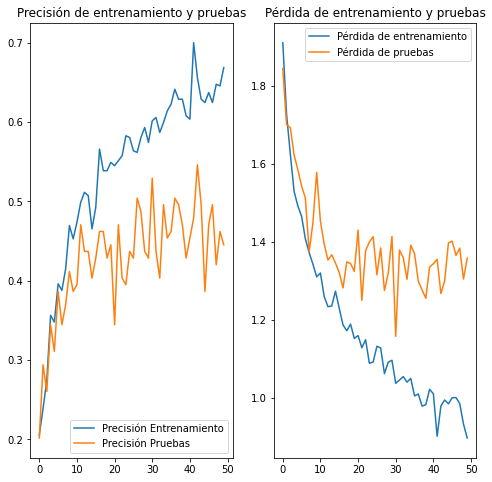

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPB_X6XgxCGBdqCcJk-aAIh8s1r5yYkg180A&usqp=CAU' #debe ser 0
prediccion = categorizar (url)
print(prediccion)


0


In [ ]:
url = 'https://st3.depositphotos.com/5625700/16150/i/950/depositphotos_161504670-stock-photo-aries-constellation-zodiac-sign-aries.jpg' #debe ser 0
prediccion = categorizar (url)
print(prediccion)

0


In [ ]:
url = 'https://www.constelaciones.info/wp-content/uploads/2015/12/Cancer.jpg' #debe ser 1
prediccion = categorizar (url)
print(prediccion)

1


In [ ]:
url = 'https://www.espacioprofundo.com/adjuntos/monthly_2019_12/cancer.jpg.1f5d54cc2b88bd039eb659ceffc99b3a.jpg' #debe ser 1
prediccion = categorizar (url)
print(prediccion)

1


In [ ]:
url = 'https://www.comprarunaestrella.com/wp-content/uploads/2018/02/tauro.jpg' #debe ser 3
prediccion = categorizar (url)
print(prediccion)

3


In [ ]:
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRKeC5m9338MmxAODfg3bViEYzvz89FK3KUTg&usqp=CAU' #debe ser 3
prediccion = categorizar (url)
print(prediccion)

3


In [ ]:
#aries=0 cancer=1 escorpio=2 tauro=3 virgo=4
url = 'https://thumbs.dreamstime.com/b/constelaci%C3%B3n-del-virgo-constelaci%C3%B3n-del-virgo-de-la-muestra-del-zodiaco-96845629.jpg' #debe ser 4
prediccion = categorizar (url)
print(prediccion)

4


In [ ]:
url = 'https://media.istockphoto.com/photos/virgo-constellation-zodiac-sign-virgo-constellation-lines-picture-id638713840?b=1&k=20&m=638713840&s=170667a&w=0&h=rcHsBOGczwqmgZbA6P8bT2b5q_5e3VBQ_DWmOY6loBM=' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

4
